In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt 


### Importando dados do IBOV 
- período de 01/01/2020 até 10/11/2020 

In [3]:
company = '^BVSP'
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,11,10)

cotacao_ibov = yf.download(company, start, end)
display(cotacao_ibov)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2020-11-03,93968.0,96250.0,93968.0,95587.0,95587.0,10191800
2020-11-04,95992.0,98296.0,95987.0,97811.0,97811.0,10704600
2020-11-05,97873.0,100922.0,97872.0,100774.0,100774.0,10455300


<Axes: xlabel='Date'>

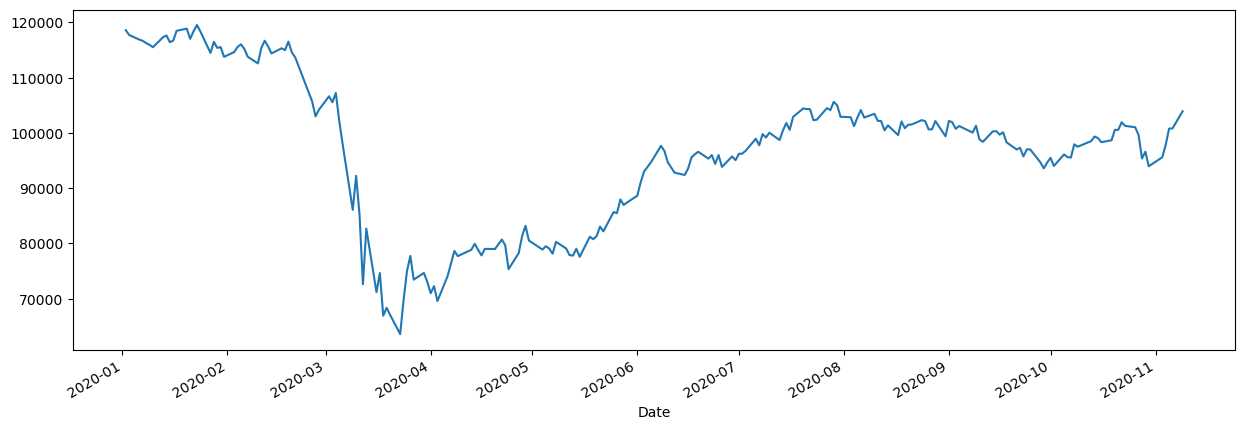

In [5]:
cotacao_ibov['Adj Close'].plot(figsize=(15,5))


- Calculando o retorno do bovespa para esse período
- Analisando a média móvel para esse período

O retorno do IBOV foi de -12.36%, para esse período.


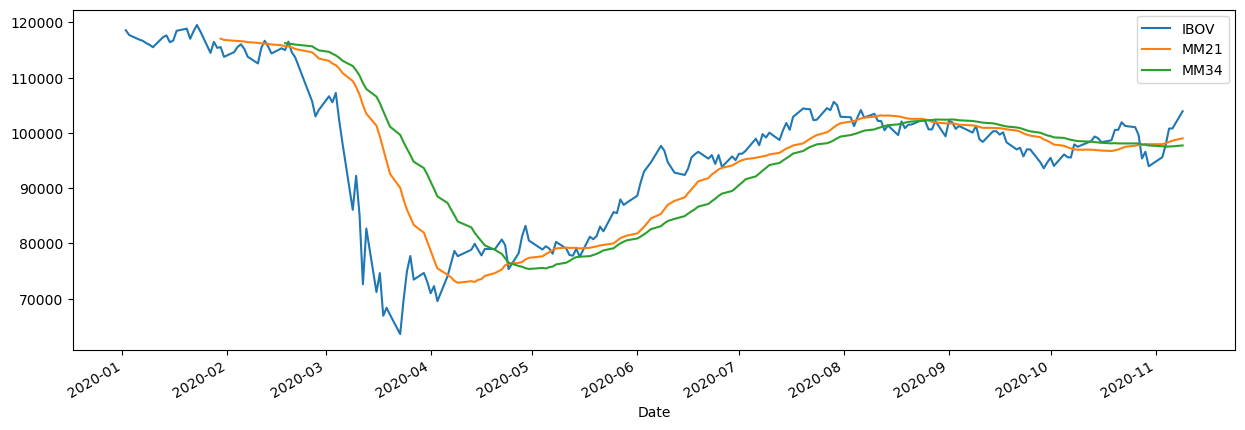

In [12]:
retorno_ibov = cotacao_ibov['Adj Close'][-1]/cotacao_ibov['Adj Close'][0] - 1
print('O retorno do IBOV foi de {:.2%}, para esse período.'.format(retorno_ibov))

cotacao_ibov['Adj Close'].plot(figsize=(15,5),label ='IBOV') 
cotacao_ibov['Adj Close'].rolling(21).mean().plot(figsize=(15,5),label ='MM21')
cotacao_ibov['Adj Close'].rolling(34).mean().plot(figsize=(15,5),label ='MM34')
plt.legend()
plt.show()


### Analisando uma carteira de investimentos com o Python
- usando um arquivo de uma carteira fictícia

In [48]:
carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


- criando um dataframe de cotações dos ativos da carteira 
- No Yahoo Finance todos os códigos de ativos na bolsa brasileira tem o sulfixo .SA

In [49]:
cotacoes_carteira = pd.DataFrame()
for ativo in carteira['Ativos']:
    cotacoes_carteira[ativo] = yf.download('{}.SA'.format(ativo), start, end)['Adj Close']
display(cotacoes_carteira)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,24.469004,33.883358,10.9650,17.084026,17.714905,38.093487,109.114685,136.040878,182.419739,NaN
2020-01-03,113.800003,140.899994,11.922435,24.481382,33.526970,11.0675,17.537739,17.766314,40.747009,110.420357,134.214798,182.419739,NaN
2020-01-06,112.589996,139.100006,11.932189,24.044096,33.028023,11.3500,17.602497,17.740608,39.882378,109.555672,135.639130,180.939194,NaN
2020-01-07,112.239998,139.399994,11.898048,23.626390,32.261787,11.2650,17.567364,17.811390,40.528366,109.702667,131.320526,181.642929,NaN
2020-01-08,111.949997,138.199997,12.263842,23.260900,31.736103,11.2125,17.655199,17.653538,40.737072,107.713898,127.339714,171.361252,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,15.115451,21.905807,13.8050,15.907243,16.902935,46.143505,92.945061,114.310837,144.692825,115.129875
2020-11-04,94.160004,112.000000,26.143793,15.005869,22.780577,14.4000,16.284946,17.820776,47.375851,92.953705,115.926903,144.747711,115.265312
2020-11-05,96.949997,115.900002,27.401571,15.238071,23.318201,14.6775,17.233583,18.608171,49.969746,92.953705,117.214264,144.564880,115.536179


#### Fazendo uma verificação dos dados 
- Podemos ver que o XPLG está com dados faltantes 
- Neste caso usaremos o bfill() do pandas, que preenche com o valor anterior da cotação, mas poderiamos preencher com um valor médio das ações ou da média móvel.

In [50]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   NTCO3   214 non-null    float64
 9   BCRI11  214 non-null    float64
 10  VILG11  214 non-null    float64
 11  KNRI11  214 non-null    float64
 12  XPLG11  109 non-null    float64
dtypes: float64(13)
memory usage: 23.4 KB


In [51]:
cotacoes_carteira = cotacoes_carteira.bfill()
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   NTCO3   214 non-null    float64
 9   BCRI11  214 non-null    float64
 10  VILG11  214 non-null    float64
 11  KNRI11  214 non-null    float64
 12  XPLG11  214 non-null    float64
dtypes: float64(13)
memory usage: 23.4 KB


### Analisando as cotações individualmente
- iremos criar uma cotação normalizada,para colocar todos os ativos na mesma base, para facilitar a nossa análise.

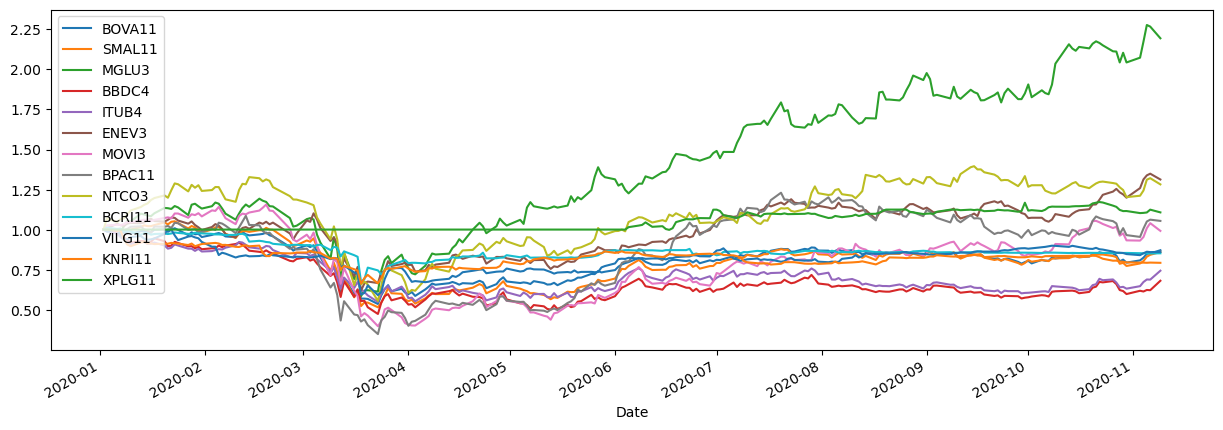

In [52]:
carteira_normalizada = cotacoes_carteira/cotacoes_carteira.iloc[0]
carteira_normalizada.plot(figsize=(15,5))
plt.legend(loc='upper left')

- comparando com o IBOV 

In [53]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo,'Qtde'].values[0]
    
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2446.900368,3388.335800,3289.500046,1708.402634,1771.490479,3809.348679,10911.468506,13604.087830,18241.973877,10438.525391
2020-01-03,11380.000305,14089.999390,11922.434807,2448.138237,3352.696991,3320.250034,1753.773880,1776.631355,4074.700928,11042.035675,13421.479797,18241.973877,10438.525391
2020-01-06,11258.999634,13910.000610,11932.188988,2404.409599,3302.802277,3405.000114,1760.249710,1774.060822,3988.237762,10955.567169,13563.912964,18093.919373,10438.525391
2020-01-07,11223.999786,13939.999390,11898.048401,2362.639046,3226.178741,3379.500103,1756.736374,1781.138992,4052.836609,10970.266724,13132.052612,18164.292908,10438.525391
2020-01-08,11194.999695,13819.999695,12263.841629,2326.090050,3173.610306,3363.749886,1765.519905,1765.353775,4073.707199,10771.389771,12733.971405,17136.125183,10438.525391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,9226.000214,10998.000336,24945.909500,1511.545086,2190.580750,4141.500092,1590.724277,1690.293503,4614.350510,9294.506073,11431.083679,14469.282532,11512.987518
2020-11-04,9416.000366,11200.000000,26143.793106,1500.586891,2278.057671,4319.999886,1628.494644,1782.077599,4737.585068,9295.370483,11592.690277,14474.771118,11526.531219
2020-11-05,9694.999695,11590.000153,27401.571274,1523.807144,2331.820107,4403.249931,1723.358345,1860.817146,4996.974564,9295.370483,11721.426392,14456.488037,11553.617859


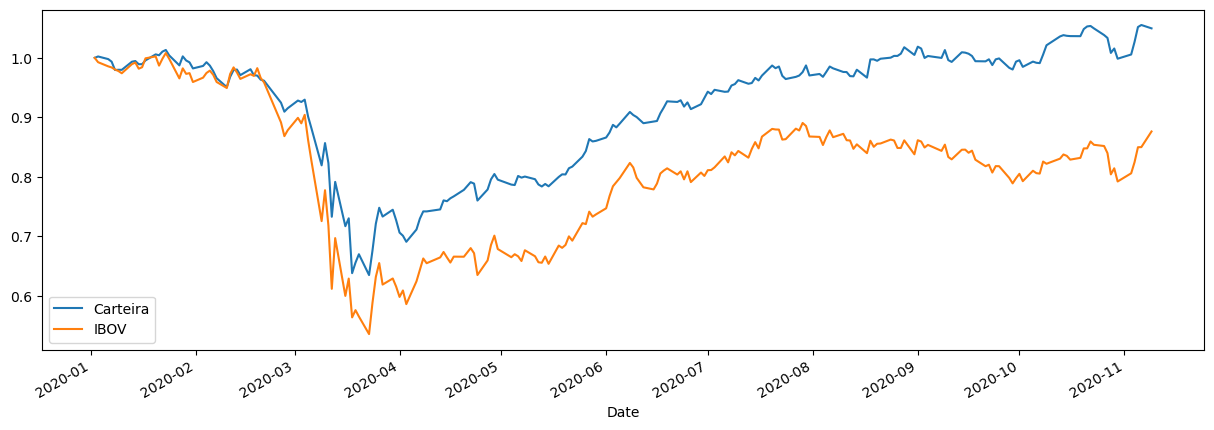

In [54]:
valor_investido['Total'] = valor_investido.sum(axis=1)
valor_investido_normalizado = valor_investido/ valor_investido.iloc[0]
cotacao_ibov_normalizado = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_normalizado['Total'].plot(figsize=(15,5),label='Carteira')
cotacao_ibov_normalizado['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()

In [55]:
retorno_carteira = valor_investido['Total'][-1]/valor_investido['Total'][0]-1

print('O retorno da carteira foi de {:.2%}, para esse período'.format(retorno_carteira))
print('O retorno do IBOV foi de {:.2%}, para esse período.'.format(retorno_ibov))

O retorno da carteira foi de 4.95%, para esse período
O retorno do IBOV foi de -12.36%, para esse período.


### Correlação da carteira com o IBOV

In [56]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print('A correlação foi de {:.2%}'.format(correlacao))

A correlação foi de 85.29%
